In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten, Conv2D,MaxPooling2D
from tensorflow.math import confusion_matrix

Loading the mnist data

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape  #(total no. of data , height of each pixel , width of each pixel) , for Y (no. of labels)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
print(X_train[69])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 203 254 252 252 252 214
   51  20   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  62 221 252 250 250 250 252
  250 160  20   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  62 211 250 252 250 250 250 252
  250 250  49   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  41 221 250 250 252 250 25

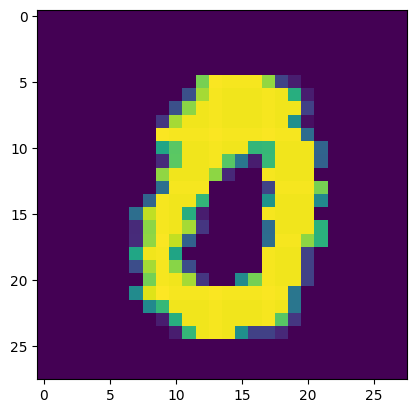

0


In [ ]:
plt.imshow(X_train[69])
plt.show()
print(Y_train[69])

In [ ]:
#image labels
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Scaling the value btw 0 and 1

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
print(X_train[69])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
img_size=28
X_train_r=np.array(X_train).reshape(-1,img_size,img_size,1)
X_test_r=np.array(X_test).reshape(-1,img_size,img_size,1)
X_train_r.shape,X_test_r.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Building Neural Network

In [ ]:
model = Sequential()
#conv layer 1
model.add(Conv2D(64 , (3,3),input_shape=X_train_r.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#conv layer 2
model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#conv layer 3
model.add(Conv2D(64 , (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully connected neural network
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,466 (326.04 KB)

 Trainable params: 83,466 (326.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model_history=model.fit(X_train_r,Y_train,validation_split=0.33,epochs=5)

Epoch 1/5
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7949 - loss: 0.6127 - val_accuracy: 0.9645 - val_loss: 0.1179
Epoch 2/5
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9708 - loss: 0.0974 - val_accuracy: 0.9722 - val_loss: 0.0865
Epoch 3/5
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9790 - loss: 0.0686 - val_accuracy: 0.9807 - val_loss: 0.0652
Epoch 4/5
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9845 - loss: 0.0492 - val_accuracy: 0.9829 - val_loss: 0.0534
Epoch 5/5
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9886 - loss: 0.0355 - val_accuracy: 0.9832 - val_loss: 0.0538


In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

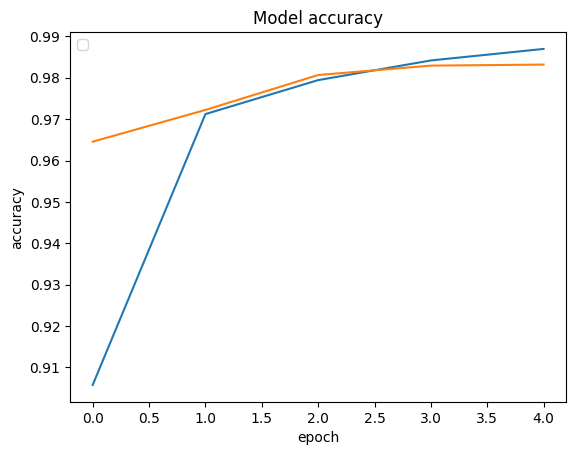

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='upper left')
plt.show()


Evaluation of model

In [ ]:
loss,accuracy=model.evaluate(X_test_r,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9826 - loss: 0.0623
0.9851999878883362


In [ ]:
predictions=model.predict(X_test_r)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(np.argmax(predictions[50]))

6


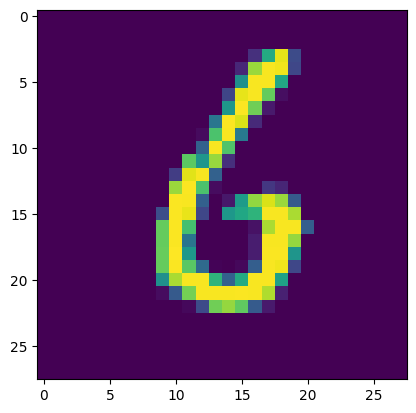

In [ ]:
plt.imshow(X_test[50])

Predictive System

In [51]:
input_image_path = '/content/mnistdata1.jpg'
input_image = cv2.imread(input_image_path)

In [52]:
type(input_image)

numpy.ndarray

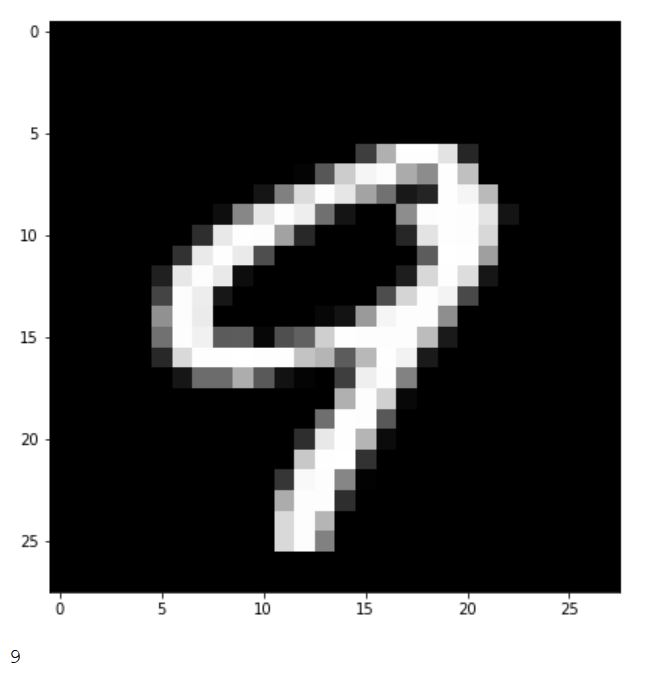

In [53]:
cv2_imshow(input_image)

In [54]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [55]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [56]:
input_image_resize = input_image_resize/255

In [62]:
image_reshaped = np.array(input_image_resize).reshape(1, 28, 28, 1)

In [63]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
[[3.3527590e-07 5.0503729e-07 2.0756590e-06 1.1027306e-03 4.0930774e-04
  1.0081788e-05 1.8525419e-06 3.3918212e-07 2.1036370e-03 9.9636912e-01]]


In [64]:
input_pred_label = np.argmax(input_prediction)

In [65]:
print(input_pred_label)

9
